In [18]:
import numpy as np
import torch
from PIL import Image
from matplotlib import pyplot as plt

In [33]:
import cityscapesscripts

ModuleNotFoundError: No module named 'cityscapesscripts'

In [12]:
file = '/Users/oscar/Downloads/gtFine_trainvaltest/gtFine/train/aachen/aachen_000000_000019_gtFine_instanceIds.png'

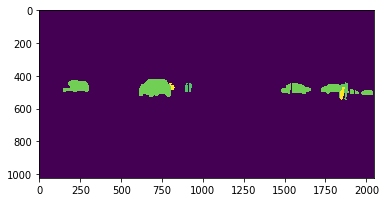

In [19]:
image = np.asarray(Image.open(file))

plt.imshow(image)

In [32]:
np.unique(image)

array([    0,     1,     3,     4,     7,     8,    11,    17,    20,
          21,    22,    23, 24000, 24001, 25000, 26003, 26004, 26005,
       26006, 26007, 26008, 26009, 26010, 33000, 33001], dtype=int32)

In [35]:
classes_with_instances = list(range(25,34))

[25, 26, 27, 28, 29, 30, 31, 32]

In [51]:
xs, ys = np.where(image == 25000)
(np.floor(np.mean(xs)), np.floor(np.mean(ys)))

(485.0, 1865.0)

In [95]:
centroids = {}
for value in np.unique(image):
    xs, ys = np.where(image == value)
    centroids[value] = np.array((np.floor(np.mean(xs)), np.floor(np.mean(ys))))

In [104]:
image.shape, target
euclidean((0, 0), (1, 1)), np.sqrt(2)
target.shape

(1024, 2048, 2)

In [102]:
from scipy.spatial.distance import euclidean
target = np.empty((image.shape[0], image.shape[1], 2))
for x, y in zip(range(0,image.shape[0]), range(0, image.shape[1])):
    target[x, y, :] = np.array((x, y)) - centroids[image[x, y]]
        
        

In [82]:
f = np.vectorize(lambda x,y: print(f'{x} {y} '))
f(np.meshgrid(range(1,5), range(1,5)))


TypeError: <lambda>() missing 1 required positional argument: 'y'

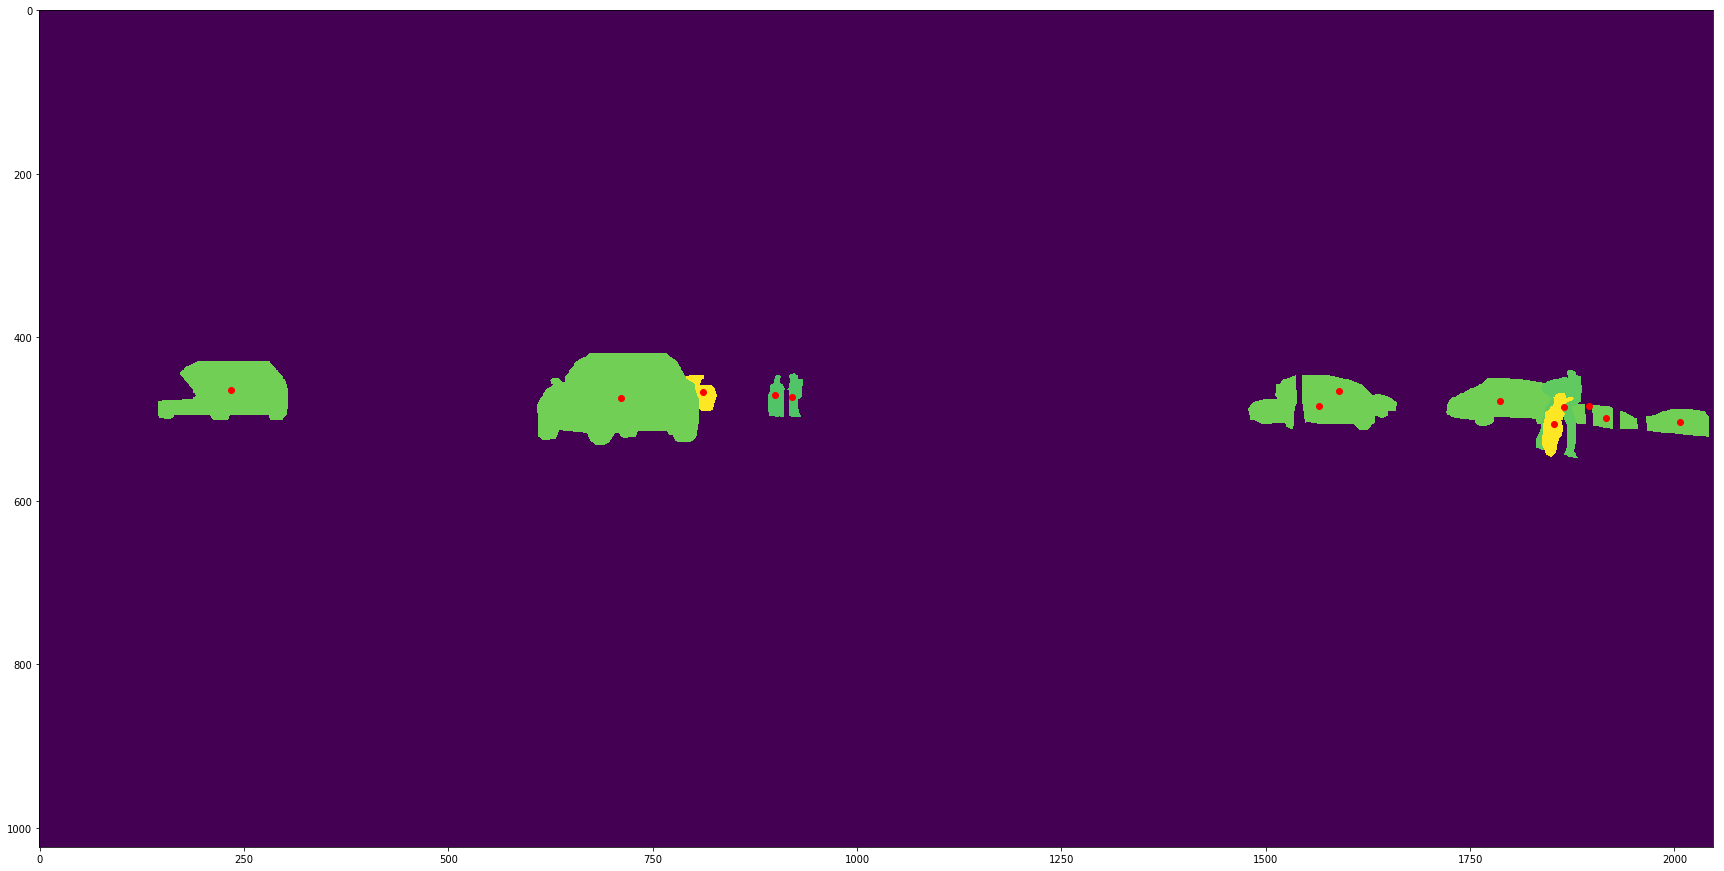

In [74]:
plt.figure(figsize=(30, 30))
plt.imshow(image)
centroids = [c for c in centroids if c[0] >= 24000]
plt.scatter([i[2] for i in centroids], [i[1] for i in centroids], c='r')


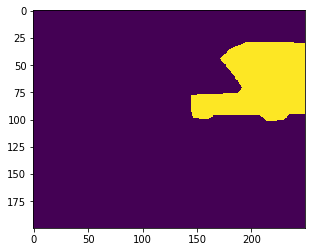

In [26]:
plt.imshow(np.image[400:600, 0:250])

In [27]:
crop = image[400:600, 0:250]
np.unique(crop, return_counts=True)


(array([    3,     7,    11,    17,    20,    21,    22, 26009],
       dtype=int32),
 array([ 1200,  4630,  5223,  3516,  8249,  1210, 20601,  5371]))

ValueError: assignment destination is read-only